In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("cat_train.csv")

In [11]:
print(df.shape)

(600000, 25)


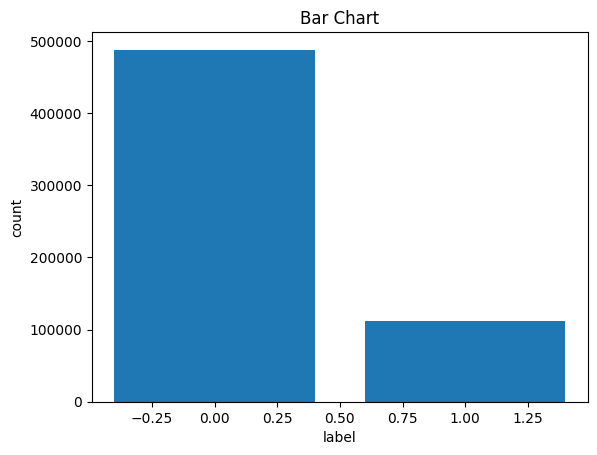

In [9]:
unique_labels, counts = np.unique(df.target.values, return_counts=True)
plt.bar(unique_labels,counts)

plt.title('Bar Chart')
plt.xlabel('label')
plt.ylabel('count')

# 显示图形
plt.show()

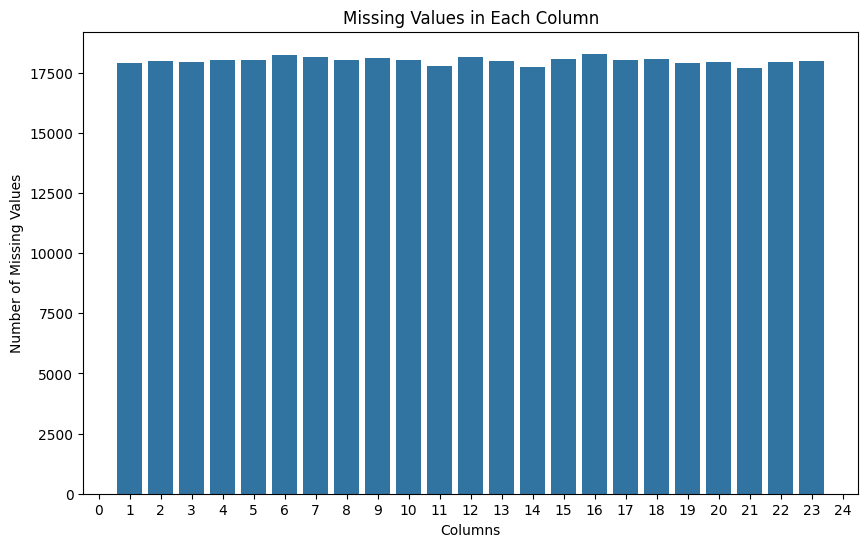

In [23]:
import seaborn as sns
null_values = df.isnull().sum()
# 输出每列的空值数量
plt.figure(figsize=(10, 6))
sns.barplot(x = list(range(len(null_values.index))),y=null_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()

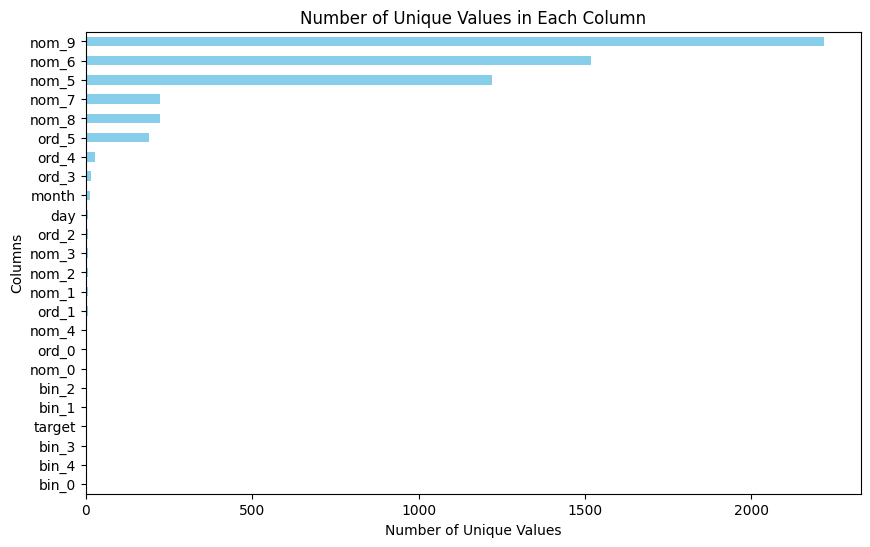

In [25]:
df1 = df.drop(columns='id',axis=1)
value_counts = df1.apply(lambda x: x.value_counts().shape[0])

# 设置图形大小
plt.figure(figsize=(10, 6))

# 画出条形图
value_counts.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values in Each Column')

plt.show()

In [27]:
import pandas as pd
from sklearn import model_selection 
if __name__ == "__main__":
    # 读取数据文件
	df = pd.read_csv("cat_train.csv")
    # 添加"kfold"列，并置为-1
	df["kfold"] = -1
    # 打乱数据顺序，重置索引
	df = df.sample(frac=1).reset_index(drop=True)
    # 将目标列取出
	y = df.target.values
    # 分层k折交叉检验
	kf = model_selection.StratifiedKFold(n_splits=5)
	for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        # 区分折叠
		df.loc[v_, 'kfold'] = f
    # 保存文件
	df.to_csv("cat_train_folds.csv", index=False)